In [ ]:
from scipy import signal
from scipy.io import wavfile
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import skimage.io
import scipy
import imageio
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

MessageError: Error: credential propagation was unsuccessful

# Objective:
Convert Real train, val, test phonocardiograms from raw wav audio to spectrograms and assign them to their respective spectrogram folders

# IMPORTANT:
Please do not run these cells if the spectrogram directories are already populated. Only run these cells to populate the spectrogram directories for the s

# Wav -> Spectrogram: Method
*Note: default sr = 22050

In [ ]:
# function for converting wav file to spectrogram png file
def wav_to_spectrogram(wav_path, out_path, plot=False, end_limit=90317, n_mels=128):
  # load wav file
  y, sr = librosa.load(wav_path)
  # computing mel spectrogram
  S = librosa.feature.melspectrogram(y=y[:end_limit], sr=sr, n_mels=n_mels)
  # converting to log scale (dB)
  log_S = librosa.power_to_db(S, ref=np.max)
  # normalizing `log_S` to be in the 0-255 range
  normalized_log_S = np.interp(log_S, (log_S.min(), log_S.max()), (0, 255))
  # flipping array vertically
  flipped_log_S = np.flipud(normalized_log_S)
  # converting to unsigned 8-bit integer as imageio expects integers for image values
  normalized_log_S_uint8 = flipped_log_S.astype(np.uint8)

  if plot:
    # plotting
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel log spectrogram')
    plt.tight_layout()
    plt.show()
  else:
    # save to png
    imageio.imwrite(out_path, normalized_log_S_uint8)

## Demo: Spectrogram Plotting from Wav File

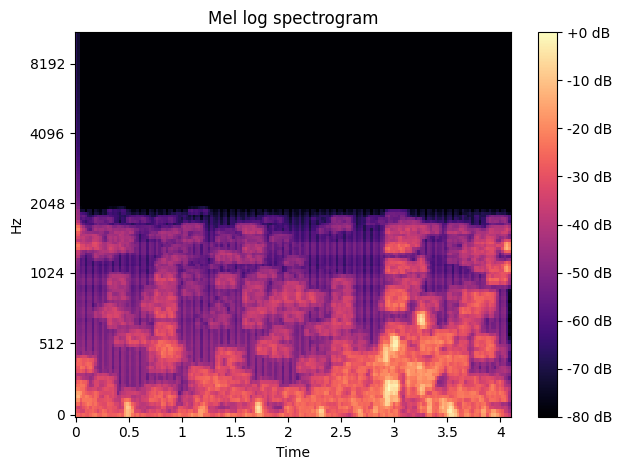

In [ ]:
# demo
real_pcg = '/content/drive/MyDrive/Stuff I Coded/PCG_synthesis/data2/real/phonocardiograms/train/85338_TV.wav'
ai_pcg = '/content/drive/MyDrive/Stuff I Coded/PCG_synthesis/generated/9.wav'
out_path = '/content/drive/MyDrive/Stuff I Coded/PCG_synthesis/test_real_300.png'
wav_to_spectrogram(ai_pcg, out_path, plot=True)

All spectrograms will be dimensions 117x128

# Wav -> Spectrogram: Action

In [ ]:
WAV_DATA_DIR = '/content/drive/MyDrive/Stuff I Coded/PCG_synthesis/data2/real/phonocardiograms/'
WAV_TRAIN_DIR = WAV_DATA_DIR + 'train/'
WAV_VAL_DIR = WAV_DATA_DIR + 'val/'
WAV_TEST_DIR = WAV_DATA_DIR + 'test/'

In [ ]:
SPEC_DATA_DIR = '/content/drive/MyDrive/Stuff I Coded/PCG_synthesis/data2/real/spectrograms/'
SPEC_TRAIN_DIR = SPEC_DATA_DIR + 'train/'
SPEC_VAL_DIR = SPEC_DATA_DIR + 'val/'
SPEC_TEST_DIR = SPEC_DATA_DIR + 'test/'
SPEC_RAW_DIR = SPEC_DATA_DIR + 'raw/'

In [ ]:
# function that will convert all wav files in one directory
# and put the corresponding spectrogram png files in another
def dirwise_wav_to_spectrogram(start_dir, end_dir):
  # obtain list of wav files in start dir
  wav_files = os.listdir(start_dir)
  # convert them all to spectrogram png files,
  # and put the png files in the spectrogram train directory
  for wav_file in wav_files:
    wav_path = start_dir + wav_file
    spec_path = end_dir + wav_file[:-4] + '.png'
    wav_to_spectrogram(wav_path, spec_path)

## Converting Train Set to Spectrograms

In [ ]:
# est time: 3 min
dirwise_wav_to_spectrogram(WAV_TRAIN_DIR, SPEC_TRAIN_DIR)

## Converting Val Set to Spectrograms

In [ ]:
# est time: 40 sec
dirwise_wav_to_spectrogram(WAV_VAL_DIR, SPEC_VAL_DIR)

## Converting Test Set to Spectrograms

In [ ]:
# est time: 40 sec
dirwise_wav_to_spectrogram(WAV_TEST_DIR, SPEC_TEST_DIR)

## Converting All Sets to a Backup Spectrogram Directory

In [ ]:
dirwise_wav_to_spectrogram(WAV_TRAIN_DIR, SPEC_RAW_DIR)
dirwise_wav_to_spectrogram(WAV_VAL_DIR, SPEC_RAW_DIR)
dirwise_wav_to_spectrogram(WAV_TEST_DIR, SPEC_RAW_DIR)